In [1]:
from langchain_pinecone import PineconeVectorStore
from config.database import embeddings


vector_store = PineconeVectorStore(index_name="recruit", embedding=embeddings,pinecone_api_key="pcsk_7Kv4Xp_PB1xJ6gg7SiMKBsBC4UaYwdcBZJbj5t8r5xuXoKjRv97Jpso4N9v849C9Q8s7tC")

c:\MinhTri\DATN_2024\recruit-main\.venv\lib\site-packages\pinecone\data\index.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
import pandas as pd

df = pd.read_excel("./job_data.xlsx")
# df.fillna("", inplace=True)

In [3]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

C:\Users\Zephyrus M16\AppData\Local\Temp\ipykernel_8032\2340421553.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [4]:
df.head()

,id,title,company_name,place,number_employee,job_name,level,salary,education,description,requirement,deadline,source_picture,content
0,1,translator,công ty tnhh hiwin hongkong,"tầng 3, tòa nhà golden palm số 21 lê văn lương...",1,chinese interpreter,middle,0 - 5 triệu,cao đẳng,phiên dịch cho quản lý người trung quốc tại i2...,"- nam/ nữ, có bằng tốt nghiệp cđ đh - tiếng tr...",45289,https://cdn1.vieclam24h.vn/tvn/images/old_empl...,công ty công ty tnhh hiwin hongkong\nvị trí: t...
1,2,business,công ty tnhh dksh việt nam,"viettel complex, 285 cach mang thang tam, phườ...",5,sales manager,senior,20 - 30 triệu,trung cấp,khu vực hcm khu vực biên hòa - đồng nai - thiế...,- có ít 01 năm kinh nghiệm supervision trong l...,45302,https://cdn1.vieclam24h.vn/images/employer_ava...,tuyển dụng tại công ty tnhh dksh việt nam!\nvị...
2,3,business,công ty cp thang máy và thiết bị thành công,"số 7a mạc thị bưởi, phường vĩnh tuy, quận hai ...",1,sales supervisor,senior,20 - 30 triệu,cao đẳng,sales supervisor,- tốt nghiệp cao đẳng / đại học. - tối thiểu 2...,45306,https://cdn1.vieclam24h.vn/images/employer_ava...,công ty công ty cp thang máy và thiết bị thành...
3,4,business,công ty tnhh chợ tốt,"uoa tower, số 6 tân trào, phường tân phú, quận 7",5,sales,junior,5 - 10 triệu,cao đẳng,việc làm tốt – chuyên trang tuyển dụng & tìm v...,ít nhất 6 tháng kinh nghiệm bán hàng/ tư vấn/ ...,45315,https://cdn1.vieclam24h.vn/images/default/2022...,tuyển dụng tại công ty tnhh chợ tốt!\nvị trí: ...
4,5,business,công ty tài chính tnhh hd saison,"tầng 3 tòa nhà vit 519 kim mã, ba đình, hà nội",30,loan consultant,middle,10 - 20 triệu,trung học,1.bán hàng qua điện thoại: - nhận cuộc gọi vào...,tốt nghiệp trung học phổ thông trở lên; có kin...,45303,https://cdn1.vieclam24h.vn/images/old_employer...,tuyển dụng tại công ty tài chính tnhh hd saiso...


In [5]:
df.columns

Index(['id', 'title', 'company_name', 'place', 'number_employee', 'job_title',
       'level', 'salary', 'education', 'description', 'requirement',
       'deadline', 'source_picture', 'content'],
      dtype='object')

In [38]:
import pandas as pd
from langchain_core.documents import Document
# Iterate through the rows of the DataFrame to create Document objects
documents = []
ids = []
for index, row in df.iterrows():
    # Assuming 'description' contains the page_content, and other columns are part of metadata
    description = row['content']
    metadata = row.drop(['company_name', 'deadline','source_picture']).to_dict()  # Drop 'description' and 'id' columns from metadata
    try:
    # Create the Document object
        doc = Document(
            page_content=description,
            metadata=metadata
        )
        
        # Use the 'id' field from the row as the document ID
        documents.append(doc)
        ids.append(str(row['id']))
    except Exception as e:
        print(f"Error creating document for ID {row['id']}: {e}")
# Now you can add these documents to your vector store (or other systems)
# 

# Optional: print the documents to verify
for doc in documents:
    print(f"content: {doc.page_content[:50]}... | Metadata: {doc.metadata}")

content: công ty công ty tnhh hiwin hongkong
vị trí: transl... | Metadata: {'id': 1, 'title': 'translator', 'place': 'tầng 3, tòa nhà golden palm số 21 lê văn lương, hà nội', 'number_employee': 1, 'job_name': 'chinese interpreter', 'level': 'middle ', 'salary': '0 - 5 triệu', 'education': 'cao đẳng', 'description': 'phiên dịch cho quản lý người trung quốc tại i2 địa chỉ: an khánh – hoài đức – hà nội. - phiên dịch khi đi gặp khách hàng, đối tác. - có thể phải đi công tác tỉnh ngắn ngày (không thường xuyên). - các công việc phát sinh theo chỉ đạo của cấp trên. - làm các báo cáo, tổng hợp, đánh giá theo yêu cầu của cấp trên. làm việc tại an khánh - hoài đức - hà nội', 'requirement': '- nam/ nữ, có bằng tốt nghiệp cđ đh - tiếng trung tốt cả 4 kỹ năng nghe nói đọc viết - chăm chỉ, nhiệt tình với công việc, chịu khó - sử dụng tốt word, excel, power point', 'content': 'công ty công ty tnhh hiwin hongkong\nvị trí: translator (middle )\nlương: 0 - 5 triệu\nedu/experience: cao đẳng, - nam/ nữ, c

In [6]:
vector_store.add_documents(documents=documents, ids=ids)



['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119']

In [9]:
documents[115]

Document(metadata={'id': 116, 'title': 'developer', 'place': 'hanoi', 'number_employee': 6, 'job_title': 'developer', 'level': 'intern', 'salary': '5 - 10 triệu', 'education': "bachelor's degree in computer science", 'description': 'develop and maintain frontend features', 'requirement': 'experience with react.js and javascript', 'content': "công ty techcorp ở hà nội\nvị trí: developer (junior)\nlương: 5 - 10 triệu\nedu/experience: bachelor's degree in computer science, experience with react.js and javascript...\njobdescription: develop and maintain frontend features\nsố điện thoại: 0123456789", 'text': "công ty techcorp ở hà nội\nvị trí: developer (junior)\nlương: 5 - 10 triệu\nedu/experience: bachelor's degree in computer science, experience with react.js and javascript...\njobdescription: develop and maintain frontend features\nsố điện thoại: 0123456789"}, page_content="công ty techcorp ở hà nội\nvị trí: developer (junior)\nlương: 5 - 10 triệu\nedu/experience: bachelor's degree in c

In [4]:
from config.database import vector_store,embeddings

In [4]:
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field
from config.llm import llm_1
from typing import Literal

prompt = ChatPromptTemplate(
    [
        (
            "system",
            """
You are an expert at routing the user's question to vectorstore or casual_convo.
choose vectorstore if the question is related to job recruitment and casual_convo otherwise. \n
vectorstore contains documents related to recruitment of human resources in all industries! Related to salary, recruitment position, job description for each job. Use vectorstore for questions about these topics that require some data and follow-up questions. Otherwise, if only need normal feedback and chat history, use casual_convo.

example:
user: Hi are you [this is a random question not related to recruitment so route to casual_convo] : casual_convo
user: Jobs for junior dev? [this question is related to CS324 so route to vectorstore] : vectorstore
""",
        ),
        ("human", "{user_input}"),
    ]
)
class RouteQuery(BaseModel):
    """Route a user query to the most relevant datasource."""

    datasource: Literal["vectorstore", "casual_convo"] = Field(
        ...,
        description="Given a user question choose to route it to casual_convo or a vectorstore.",
    )
chain = prompt | llm_1.with_structured_output(RouteQuery)

chain.invoke({"user_input": "Tôi muốn tìm việc làm lập trình python"})

RouteQuery(datasource='vectorstore')

In [1]:
from langchain_core.prompts import ChatPromptTemplate
from config.llm import llm_1
re_write_query_prompt = ChatPromptTemplate(
    [
        (
            "system",
            """You a question re-writer that converts an input question to a better version that is optimized
    for vectorstore retrieval, and very concise. Look at the input and try to reason about the underlying semantic intent/meaning. The input can also be a
    follow up question, look at the chat history to re-write the question to include necessary info from the chat history to a better version that is optimized
    for vectorstore retrieval without any other info needed. [the topic of convo will be generally around recruitment topic. You need to re-write query base on history and include keyword related to this topic
    Answer in {language} language.""",
        ),
        ("placeholder", "{history}"),
        (
            "human",
            "{question}",
        ),
    ]
)
chain = re_write_query_prompt | llm_1
chain.invoke({
    "language":"vi",
  "question": "Công việc tốt nhất cho sinh viên công nghệ phần mềm mới ra trường?",
  "chat_history": [
      {"type": "human", "content": "Xin chào , tôi muốn tìm một công việc"},
      {"type": "ai", "content": "Bạn đang tìm kiếm công việc gì?"}
  ]
})

c:\MinhTri\DATN_2024\recruit-main\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AIMessage(content='```vi\nTìm việc làm phù hợp cho sinh viên CNPM mới tốt nghiệp.\n```\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-908b6e81-b768-4c53-b174-0ec99088e071-0', usage_metadata={'input_tokens': 147, 'output_tokens': 21, 'total_tokens': 168, 'input_token_details': {'cache_read': 0}})

In [18]:
from langchain_pinecone import PineconeVectorStore
from config.database import embeddings


vector_store = PineconeVectorStore(index_name="recruit", embedding=embeddings,pinecone_api_key="pcsk_7Kv4Xp_PB1xJ6gg7SiMKBsBC4UaYwdcBZJbj5t8r5xuXoKjRv97Jpso4N9v849C9Q8s7tC")

In [33]:
filter = {"level": "middle", "title": "other"}
retriever = vector_store.as_retriever(
    search_type="similarity_score_threshold",
    search_kwargs={"k": 5, "score_threshold": 0.0},
)
documents = retriever.invoke(
    "Tìm việc làm lập trình viên ReactJS", filter={"level": "junior", "title": "developer"}
)
documents

[Document(id='118', metadata={'content': "tuyển dụng tại techcorp!\nvị trí: developer - junior\nthu nhập: 5 - 10 triệu\nyêu cầu: bachelor's degree in computer science, experience with react.js and javascript...\nmô tả công việc: develop and maintain frontend features\nliên hệ: 0987654321", 'description': 'develop and maintain frontend features', 'education': "bachelor's degree in computer science", 'id': 118.0, 'job_name': 'developer', 'level': 'junior', 'number_employee': 6.0, 'place': 'hanoi', 'requirement': 'experience with react.js and javascript', 'salary': '5 - 10 triệu', 'title': 'developer'}, page_content="tuyển dụng tại techcorp!\nvị trí: developer - junior\nthu nhập: 5 - 10 triệu\nyêu cầu: bachelor's degree in computer science, experience with react.js and javascript...\nmô tả công việc: develop and maintain frontend features\nliên hệ: 0987654321"),
 Document(id='117', metadata={'content': "công ty techcorp\nvị trí: developer (junior)\nlương: 5 - 10 triệu\nedu/experience: bac

In [6]:
documents

[Document(id='109', metadata={'content': 'Công ty Trường Anh Ngữ Quốc Tế Âu Việt Mỹ (Công Ty TNHH Giáo Dục Đào Tạo Toàn Khánh) đang tìm kiếm Other ở cấp độ Middle.\nMức lương: 10 - 20 triệu\nYêu cầu: Đại học, -\xa0Tốt nghiệp Đại học bằng tiếng Anh học giảng dạy ...\nChi tiết công việc: - Trực tiếp giảng dạy các chương trình tiếng anh theo phân công của Trung tâm. - Soạn bài và chuẩn bị bài trước khi lên lớp - Giáo viên đứng lớp, trợ giảng theo sự bố trí - Theo dõi tình hình lớp học, chăm sóc và hỗ trợ học viên đạt điểm. - Tham gia tập huấn và các buổi bồi dưỡng chuyên môn để cải thiện phương pháp và kinh nghiệm giảng dạy nhằm nâng cao chất lượng dạy và học. - Hoàn thành báo cáo tuần tháng.\nHotline: 0912345678', 'description': '- trực tiếp giảng dạy các chương trình tiếng anh theo phân công của trung tâm. - soạn bài và chuẩn bị bài trước khi lên lớp - giáo viên đứng lớp, trợ giảng theo sự bố trí - theo dõi tình hình lớp học, chăm sóc và hỗ trợ học viên đạt điểm. - tham gia tập huấn và 

In [ ]:
from langchain_pinecone import PineconeVectorStore
from config.database import embeddings

vector_store = PineconeVectorStore(
    index_name="recruit",
    embedding=embeddings,
    pinecone_api_key="pcsk_7Kv4Xp_PB1xJ6gg7SiMKBsBC4UaYwdcBZJbj5t8r5xuXoKjRv97Jpso4N9v849C9Q8s7tC"
)

filter = {
    "title": "developer",
    "level": "junior"
}

retriever = vector_store.as_retriever(
    search_type="similarity_score_threshold",
    search_kwargs={"k": 5, "score_threshold": 0.0},  # Tìm kiếm top 5 tài liệu với ngưỡng điểm >= 0.0
)

query = "công việc IT"
documents = retriever.invoke(query, filter=filter)

print("Retrieved Documents:", documents)


Retrieved Documents: [Document(id='118', metadata={'content': "tuyển dụng tại techcorp!\nvị trí: developer - junior\nthu nhập: 5 - 10 triệu\nyêu cầu: bachelor's degree in computer science, experience with react.js and javascript...\nmô tả công việc: develop and maintain frontend features\nliên hệ: 0987654321", 'description': 'develop and maintain frontend features', 'education': "bachelor's degree in computer science", 'id': 118.0, 'job_title': 'developer', 'level': 'junior', 'number_employee': 6.0, 'place': 'hanoi', 'requirement': 'experience with react.js and javascript', 'salary': '5 - 10 triệu', 'title': 'developer'}, page_content="tuyển dụng tại techcorp!\nvị trí: developer - junior\nthu nhập: 5 - 10 triệu\nyêu cầu: bachelor's degree in computer science, experience with react.js and javascript...\nmô tả công việc: develop and maintain frontend features\nliên hệ: 0987654321"), Document(id='116', metadata={'content': "công ty techcorp\nvị trí: developer (junior)\nlương: 5 - 10 triệu

In [37]:
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from config.llm import llm_1, llm_2


extract_filter_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """You are an expert at extracting metadata from the user's question about recruitment and using it to filter the retrieved documents.

    Fields to extract:
      - Job level: The level of the job the user is asking about. Possible values are:
        + intern
        + fresher
        + junior
        + middle
        + senior
        + expert
      - Job title: The title of the job the user is asking about.
        + developer
        + engineer
        + designer
        + business
        + translator
        + other (if the job title is not in the list above)
      - Job Name: The specific job name derived from keywords in the question. Translate relevant keywords into English if necessary and convert them to lowercase.
      
    Note: 
      Leave the field blank if the information is not present in the user's question.
        If the user's question contains multiple job titles, choose the most relevant one.
        If the user's question contains multiple job levels, choose the most relevant one.
        If not sure about job-title or job-level, leave it blank.
        If the question contains specific job names, translate the job names to English, convert them to lowercase, and include them here.
"""
        ),
        ("placeholder", "{history}"),
        ("user", "{question}"),
    ]
)


class ExtractFilter(BaseModel):
    """Extract job level and job title from user question."""

    job_level: str = Field(description="The level of the job the user is asking about.")
    job_title: str = Field(description="The title of the job the user is asking about.")
    job_name: str = Field(description="The name of the job the user is asking about.")
    
    
chain = extract_filter_prompt | llm_1.with_structured_output(ExtractFilter)
chain.invoke({
  "history":[],
  "question":"Tôi muốn tìm một công việc thông dịch viên với bằng cao đẳng"
})

ExtractFilter(job_level='junior', job_title='translator', job_name='translator')

In [20]:
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.documents import Document
from logger import logger
from typing import List


check_relevant_document_prompt = ChatPromptTemplate(
    [
        (
            "system",
            """
You are a grader assessing relevance of a retrieved document to a user question. 
If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. 
It does not need to be a stringent test. The goal is to filter out erroneous retrievals. 
Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.
Then, give a score ranges from 0 to 1, with higher values indicating a stronger match and the more corresponding keywords.
""",
        ),
        (
            "human",
            "Retrieved document: \n\n {document} \nvs\n User question: {question}",
        ),
    ]
)


class GradeDocuments(BaseModel):
    """Binary score for relevance check on retrieved documents."""

    binary_score: str = Field(
        description="Documents are relevant to the question, 'yes' or 'no'"
    )


state = {
    "user_query": Document(page_content="I need information about Python programming."),
    "documents": [
        Document(page_content="This document is relevant to Python."),
        Document(page_content="This document is about Java."),
        Document(page_content="This is also relevant to Python coding."),
    ],
}

def grade_document_fn(state):
    """
    Function to grade the relevance of documents to a user query.
    """
    question = state["user_query"].page_content
    documents = state["documents"]
    inputs_batch = [
        {"question": question, "document": doc.page_content} for doc in documents
    ]

    # Giả lập quá trình chấm điểm (thay thế bằng lời gọi chuỗi thực tế nếu đã được triển khai).
    grade_document_response: List[GradeDocuments] = [
        GradeDocuments(binary_score="yes" if "relevant" in doc["document"].lower() else "no")
        for doc in inputs_batch
    ]

    logger.info(f"Grade document response: {grade_document_response}")
    
    # Lọc tài liệu liên quan
    document_index = [
        index for index, doc in enumerate(grade_document_response) if doc.binary_score == "yes"
    ]
    filtered_documents = [documents[i] for i in document_index]

    return {"documents": filtered_documents}


# Gọi hàm và trả kết quả
result = grade_document_fn(state)
print(result)


2024-12-31 03:39:03,498 | RECRUITMENT | MainThread | INFO     | 2417910136:52 - Grade document response: [GradeDocuments(binary_score='yes'), GradeDocuments(binary_score='no'), GradeDocuments(binary_score='yes')]


{'documents': [Document(metadata={}, page_content='This document is relevant to Python.'), Document(metadata={}, page_content='This is also relevant to Python coding.')]}


In [5]:
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from config.llm import llm_2
from langchain_core.documents import Document
import logging
from typing import Optional

# Logger setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Class definitions
class State:
    def __init__(self, user_query, documents, language):
        self.user_query = user_query
        self.documents = documents
        self.language = language

class GenerateAnswer(BaseModel):
    """Generate an answer based on the provided documents."""

    answer: str = Field(description="Generated answer based on the provided documents.")
    selected_document_index: Optional[int] = Field(
        description="Index of the selected document."
    )

# Define a function to convert a list of documents to a single context string
def convert_list_context_source_to_str(documents):
    context = "\n\n".join([doc.page_content for doc in documents])
    return context

# Define the ChatPromptTemplate
gen_answer_rag_prompt = ChatPromptTemplate(
    [
        (
            "system",
            """You are chat bot related to recruitment. You are asked to generate an answer based on the provided documents.
Your are given context related to job description of a job position. If the context not provided, you just say 'không có tài liệu liên quan'
Use the provided context to generate an answer. Do not respond with 'no information available' unless the context is entirely empty or irrelevant.
Answer in {language} language.

Context:
```
{context}
```

""",
        ),
        (
            "human",
            """
    Question: {question}        
                """,
        ),
    ]
)

gen_answer_rag_chain = gen_answer_rag_prompt | llm_2.with_structured_output(
    GenerateAnswer
)

# Define the main function
def generate_answer_rag_fn(state: State):
    question = state.user_query.page_content
    documents = state.documents
    language = state.language

    if documents:
        context_str = convert_list_context_source_to_str(documents)
        logger.info(f"context_str: {context_str}")
    else:
        context_str = ""

    gen_answer_response: GenerateAnswer = gen_answer_rag_chain.invoke(
        {"question": question, "context": context_str, "language": language}
    )
    # logger.info(f"State_data: {question,context_str,language}")
    logger.info(f"Generate answer response: {gen_answer_response}")

    id_selected = None
    if gen_answer_response.selected_document_index is not None:
        id_selected = documents[gen_answer_response.selected_document_index].metadata[
            "id"
        ]
    logger.info(f"Document id selected: {id_selected}")

    return {
        "llm_response": gen_answer_response.answer,
        "document_id_selected": id_selected,
    }

# Mock Data for Testing
mock_documents = [
    Document(page_content="Đây là tài liệu số 1 về lập trình Python.", metadata={"id": "1"}),
    Document(page_content="Đây là tài liệu số 2 về lập trình Java.", metadata={"id": "2"}),
]
mock_state = State(
    user_query=Document(page_content="Hãy cho tôi biết về lập trình Python."),
    documents=mock_documents,
    language="vi",
)

# Run the function and print the result
result = generate_answer_rag_fn(mock_state)
print(result)


INFO:__main__:context_str: Đây là tài liệu số 1 về lập trình Python.

Đây là tài liệu số 2 về lập trình Java.
INFO:__main__:Generate answer response: answer='Tài liệu số 1 đề cập đến lập trình Python.' selected_document_index=0
INFO:__main__:Document id selected: 1


{'llm_response': 'Tài liệu số 1 đề cập đến lập trình Python.', 'document_id_selected': '1'}


In [47]:
from pydantic import BaseModel, Field
from typing import Literal
import logging
from langchain_core.documents import Document


class State:
    def __init__(self, user_query, llm_response, language):
        self.user_query = user_query
        self.llm_response = llm_response
        self.language = language

state = {
    "user_query": Document(page_content="Tôi cần thêm thông tin về ngôn ngữ Python"),
    "llm_response": "Đây là tài liệu về lập trình ngôn ngữ Python"
}

def grade_hallucinations_fn(state: State):
    question = state["user_query"].page_content
    llm_response = state["llm_response"]
    grade_response: GradeHallucinations = grade_hallucinations_chain.invoke(
        {"question": question, "generation": llm_response}
    )
    logger.info(f"Grade hallucinations response: {grade_response}")
    return {"grade_response": grade_response.binary_score}

grade_answer_prompt = ChatPromptTemplate(
    [
        (
            "system",
            """You are a grader assessing whether an answer addresses / resolves a question \n 
    Give a binary score 'yes' or 'no'. Yes' means that the answer resolves the question.
    If the LLM Generation is saying that it doesnt know or not sure or stating to keep the questions relevant to topic , grade it as 'yes'.""",
        ),
        (
            "human",
            "If the LLM Generation is saying that it doesnt know or not sure or stating to keep the questions relevant to topic , grade it as 'yes'. User question: \n\n {question} \n\n LLM generation: {generation}",
        ),
    ]
)

class GradeHallucinations(BaseModel):
    """Binary score for grounding of generation answer in provided facts."""

    binary_score: Literal["yes", "no"] = Field(
        description="Whether the answer is grounded in the provided facts. 'yes' if the answer is supported by facts, 'no' if the answer contains information not present or contradicting the given facts"
    )
    
grade_hallucinations_chain = grade_answer_prompt | llm_1.with_structured_output(GradeHallucinations)
result = grade_hallucinations_fn(state)
print(result)


INFO:__main__:Grade hallucinations response: binary_score='yes'


{'grade_response': 'yes'}


In [50]:
from config.llm import llm_1

gen_answer_history_prompt = ChatPromptTemplate(
    [
        (
            "system",
            "You are assitant related recruitment. Using your knowledge about recruitment domain. If you not sure about the answer, just say that you don't know.",
        ),
        ("placeholder", "{history}"),
        ("user", "{question}"),
    ]
)

question = {
    "history":[],
    "question":"Chào bạn , bạn khoẻ không"
}

gen_answer_normal_chain = gen_answer_history_prompt | llm_1
gen_answer_normal_chain.invoke(question)

AIMessage(content='Tôi khỏe, cảm ơn bạn!  Bạn khỏe không?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-4ddd18b8-430f-4843-a076-6dde7dad4261-0', usage_metadata={'input_tokens': 40, 'output_tokens': 13, 'total_tokens': 53, 'input_token_details': {'cache_read': 0}})

/Users/baohoton/CODE/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


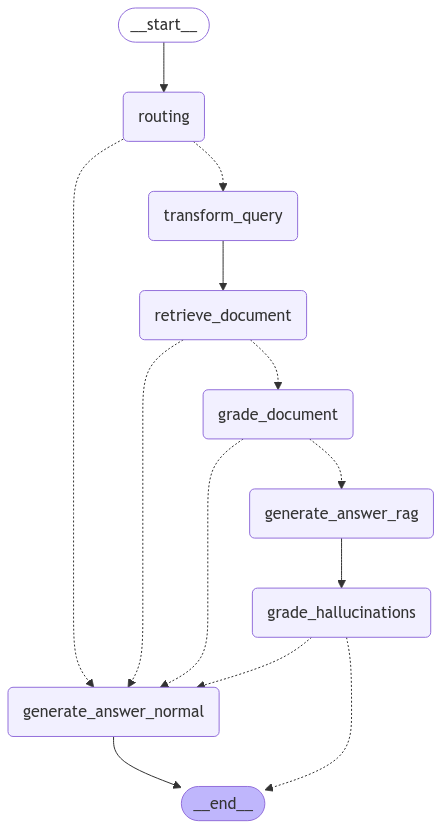

In [1]:
from graph import app  
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)


In [1]:
from graph import app

from langchain_core.messages import HumanMessage, AIMessage

message = "Tôi muốn tìm việc reactjs"
# HumanMessage(content="Chào bạn"),
# AIMessage(content="Bạn muốn tìm job gì?"),
# HumanMessage(content="Tôi muốn tìm job dạy học cho trung cấp"),
# AIMessage(content=)
history = []
initial_input = {
    "user_query": HumanMessage(content=message),
    "messages_history": [],
    "language": "vi",
}
while True:
    try:
        user_query = input("User: ")
        if user_query == "exit":
            break
        history.append(HumanMessage(content=user_query))
        response = app.invoke(
            {
                "user_query": HumanMessage(content=user_query),
                "messages_history": history,
                "language": "vi",
            }
        )["llm_response"]
        print(f"Bot: {response}")
        history.append(AIMessage(content=response))
    except Exception as e:
        print(f"Error: {e}")

/Users/baohoton/CODE/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-24 22:55:03,296 | RECRUITMENT | MainThread | INFO     | graph_function:39 - Route response: datasource='vectorstore'
2024-12-24 22:55:03,801 | RECRUITMENT | MainThread | INFO     | graph_function:49 - Transform response: content='Tìm kiếm việc làm ReactJS.\n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-92cb9192-eaa1-4213-aec0-87fe8a91b176-0' usage_metadata={'input_tokens': 131, 'output_tokens': 9, 'total_tokens': 140, 'input_token_details': {'cache_read': 0}}
2024-12-24 22:55:04,726 | RECRUITMENT | MainThread | INFO     | graph_function:61 - Extract filter response: job_level='' job_title='developer'
2024-12-24

Bot: Công ty TechCorp đang tuyển dụng vị trí Developer (Junior) với mức lương từ 5 đến 10 triệu. Yêu cầu ứng viên có bằng cử nhân khoa học máy tính và kinh nghiệm với React.js và JavaScript. Mô tả công việc bao gồm phát triển và bảo trì các tính năng front-end.  Liên hệ: 0123456789 hoặc 0987654321


2024-12-24 22:55:23,362 | RECRUITMENT | MainThread | INFO     | graph_function:39 - Route response: datasource='casual_convo'
2024-12-24 22:55:24,078 | RECRUITMENT | MainThread | INFO     | graph_function:133 - Generate answer response: content='Câu hỏi trước của bạn là: "Tôi muốn tìm việc reactjs"\n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-c3a9dec2-1866-4c27-98ba-120bab3a2402-0' usage_metadata={'input_tokens': 200, 'output_tokens': 16, 'total_tokens': 216, 'input_token_details': {'cache_read': 0}}


Bot: Câu hỏi trước của bạn là: "Tôi muốn tìm việc reactjs"



2024-12-24 22:55:31,555 | RECRUITMENT | MainThread | INFO     | graph_function:39 - Route response: datasource='vectorstore'
2024-12-24 22:55:32,069 | RECRUITMENT | MainThread | INFO     | graph_function:49 - Transform response: content='Sales job search\n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-9755df7a-cebb-4e84-a377-f8a4f65eb911-0' usage_metadata={'input_tokens': 130, 'output_tokens': 4, 'total_tokens': 134, 'input_token_details': {'cache_read': 0}}
2024-12-24 22:55:32,750 | RECRUITMENT | MainThread | INFO     | graph_function:61 - Extract filter response: job_level='' job_title='business'
No relevant docs were retrieved using the relevance score threshold 0.0
2024-12-24 22:55:33,400 | RECRUITMENT | MainThread | INFO     | graph_function:74 - Retrieved documents: []
2024-12-24 22:55:34,422 | RECRUITMENT | MainThread | INFO     | graph_function:133 - Generate answer r

Bot: To help you with your sales job search, I need some more information.  What kind of sales are you interested in?  (e.g., B2B, B2C, SaaS, inside sales, outside sales, etc.)  What's your experience level?  What's your desired salary range and location?  Knowing this will help me understand what's currently trending in the market that might be relevant to your search.



2024-12-24 22:55:42,074 | RECRUITMENT | MainThread | INFO     | graph_function:39 - Route response: datasource='casual_convo'
2024-12-24 22:55:44,561 | RECRUITMENT | MainThread | INFO     | graph_function:133 - Generate answer response: content="Okay.  Since you haven't provided any further information about your sales job search, I can't give you specific advice tailored to your needs. However, I can tell you about some hot trends in the recruitment domain that might be relevant to your search for a sales position:\n\n* **Emphasis on skills over experience:**  Many companies are now focusing more on assessing a candidate's skills and aptitude rather than solely relying on years of experience.  This means that even if you're early in your career, you might have a better chance if you can demonstrate relevant skills.\n\n* **Remote and hybrid work:** The demand for remote and hybrid sales roles continues to be very high.  This opens up opportunities geographically and offers more flexibi

Bot: Okay.  Since you haven't provided any further information about your sales job search, I can't give you specific advice tailored to your needs. However, I can tell you about some hot trends in the recruitment domain that might be relevant to your search for a sales position:

* **Emphasis on skills over experience:**  Many companies are now focusing more on assessing a candidate's skills and aptitude rather than solely relying on years of experience.  This means that even if you're early in your career, you might have a better chance if you can demonstrate relevant skills.

* **Remote and hybrid work:** The demand for remote and hybrid sales roles continues to be very high.  This opens up opportunities geographically and offers more flexibility.

* **Sales technology proficiency:**  Familiarity with CRM software (Salesforce, HubSpot, etc.) and sales automation tools is becoming increasingly important.  Highlighting your proficiency in these areas will make your application stand o